In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("data.csv")

In [3]:
df.head()

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647


In [4]:
X=df.iloc[:,0:3].values
y=df.iloc[:,-1].values

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [6]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [7]:
lr.fit(X_train,y_train)

LinearRegression()

In [9]:
y_pred=lr.predict(X_test)
residual=y_test-y_pred

# 5 Assumptions of Linear Regression

# 1.Linear Relationship between input and output

Text(0.5, 1.0, 'Feature 3')

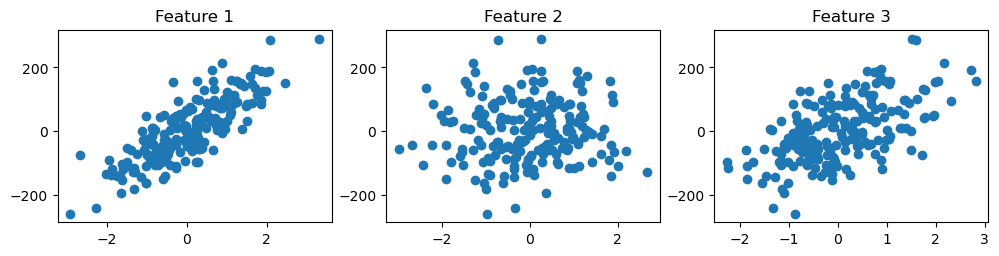

In [12]:
fig, (ax1,ax2,ax3)=plt.subplots(ncols=3,figsize=(12,2.5))
ax1.scatter(df["feature1"],df["target"])
ax1.set_title("Feature 1")
ax2.scatter(df["feature2"],df["target"])
ax2.set_title("Feature 2")
ax3.scatter(df["feature3"],df["target"])
ax3.set_title("Feature 3")

# 2. No Multicollinearity

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[]
for i in range (X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train,i))

In [14]:
pd.DataFrame({'vif': vif}, index=df.columns[0:3]).T

,feature1,feature2,feature3
vif,1.010326,1.009871,1.01395


- Since the VIF is close to 1 there is no multicollinearity in data
- If VIF is 5 or greater than 5 there will be multicollinearity present in the data.

### Another technique to find multicollinearity

<Axes: >

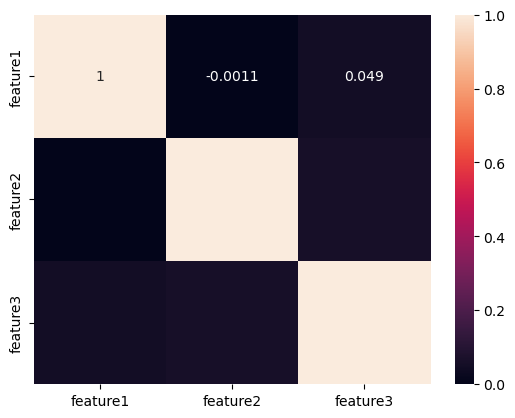

In [16]:
sns.heatmap(df.iloc[:,0:3].corr(),annot=True)

- From above heatmap you can see that , relation between columns are less than the minimum scale hence no multicollinearity in the data.

# 3.Normality of Residual

C:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


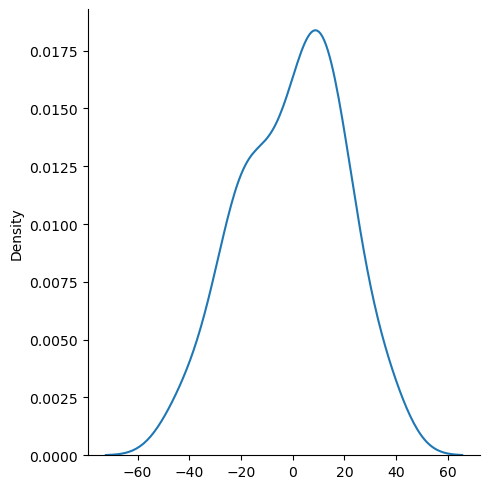

In [21]:
sns.displot(residual,kind='kde')

- From graph you can see that distribution of Residual(Error) is normal .

#### QQ plot for Normality of Residual

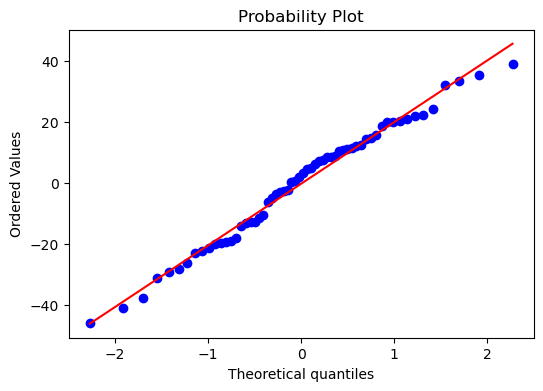

In [23]:
import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual, plot=ax, fit=True)

plt.show()

- In above graph all point are closer to line which means distribution of residual is normal
- If points are distant from line then there will be no nomal distribution in residual.

# 4.Homoscedasticity

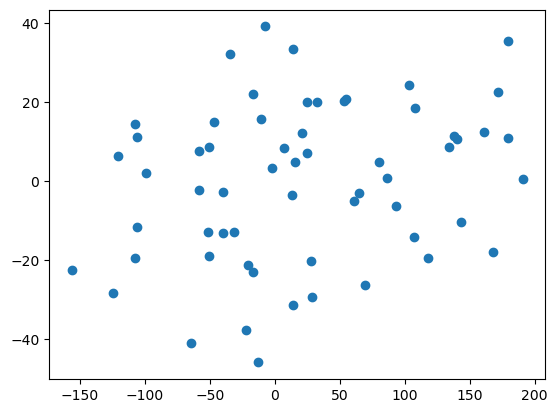

In [24]:
plt.scatter(y_pred,residual)

- From above you can see that spread of the Residual is equal
- Since the above scatter plot is representing the Homoscedasticity

# 5.Autocorrelations of Residuals

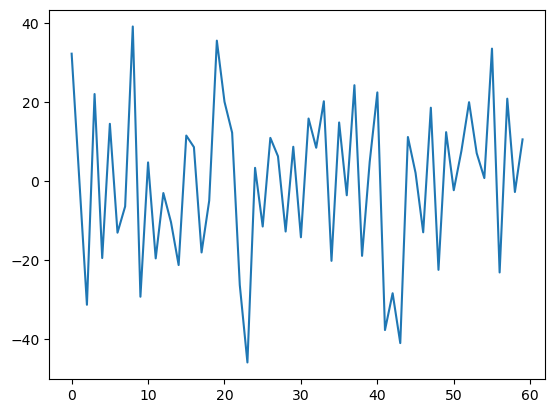

In [27]:
plt.plot(residual)

- Since the Above plot graph is distorted and not in Linear form represents the negative Autocorrelation.
- There is no pattern in residual.
- The Graph represents the negative Autocorrelation which means no relation between residual(error).

# Conclude